# Estudo de Caso

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv("attendance_performance.csv")

In [ ]:
data

,Unnamed: 0,Performance,Treatment,Attendance,Attendance_c
0,1,77.702123,0,88.963102,9.703697
1,2,76.427011,0,88.842512,9.583107
2,3,61.506374,1,62.684335,-16.575070
3,4,76.465925,0,83.401473,4.142068
4,5,87.255437,0,94.567788,15.308383
...,...,...,...,...,...
995,996,74.207382,0,89.406917,10.147512
996,997,53.260394,1,61.685627,-17.573778
997,998,74.140383,0,90.999837,11.740432
998,999,59.254342,1,71.001560,-8.257845


In [ ]:
data.shape

(1000, 5)

In [ ]:
df_temp = data[['Performance', 'Attendance']].copy()
df_temp

,Performance,Attendance
0,77.702123,88.963102
1,76.427011,88.842512
2,61.506374,62.684335
3,76.465925,83.401473
4,87.255437,94.567788
...,...,...
995,74.207382,89.406917
996,53.260394,61.685627
997,74.140383,90.999837
998,59.254342,71.001560


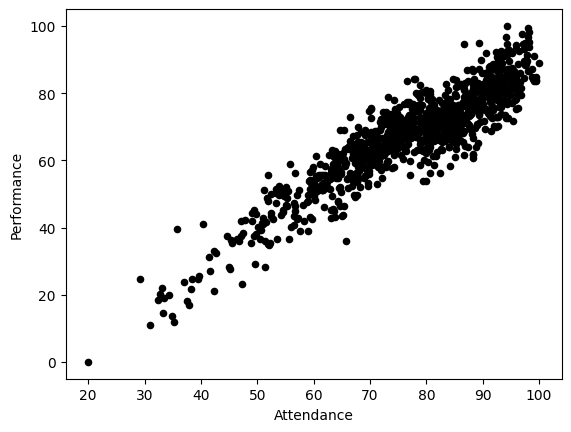

In [ ]:
ax1 = df_temp.plot.scatter(x='Attendance', y='Performance', c='Black')

In [ ]:
cutoff_point = df_temp['Attendance'].median()
cutoff_point

79.2594048757705

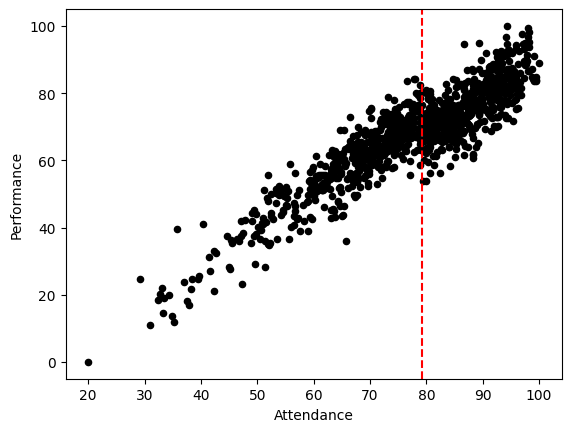

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_temp is your DataFrame
ax1 = df_temp.plot.scatter(x='Attendance', y='Performance', c='Black')

# Add a dashed vertical line at Attendance=cutoff_point
ax1.axvline(x=cutoff_point, color='red', linestyle='--')

# Show the plot
plt.show()


In [ ]:
df_temp[df_temp['Attendance']<cutoff_point].Attendance.mean(), df_temp[df_temp['Attendance']>=cutoff_point].Attendance.mean()

(65.85638054009779, 88.13723300018566)

In [ ]:
df_temp['Attendance'].median()

79.2594048757705

In [ ]:
df_temp['Attendance_c'] = df_temp['Attendance'] - df_temp['Attendance'].median()
df_temp

,Performance,Attendance,Attendance_c
0,77.702123,88.963102,9.703697
1,76.427011,88.842512,9.583107
2,61.506374,62.684335,-16.575070
3,76.465925,83.401473,4.142068
4,87.255437,94.567788,15.308383
...,...,...,...
995,74.207382,89.406917,10.147512
996,53.260394,61.685627,-17.573778
997,74.140383,90.999837,11.740432
998,59.254342,71.001560,-8.257845


In [ ]:
data[['Attendance', 'Performance']]

,Attendance,Performance
0,88.963102,77.702123
1,88.842512,76.427011
2,62.684335,61.506374
3,83.401473,76.465925
4,94.567788,87.255437
...,...,...
995,89.406917,74.207382
996,61.685627,53.260394
997,90.999837,74.140383
998,71.001560,59.254342


In [ ]:
# Calculate means
mean_treatment_1 = data.loc[data['Treatment'] == 1, 'Performance'].mean()
mean_treatment_0 = data.loc[data['Treatment'] == 0, 'Performance'].mean()

print("Mean for treatment group:", mean_treatment_1)
print("Mean for control group:", mean_treatment_0)

# Linear regression model
reg = sm.OLS(data['Performance'], sm.add_constant(data[['Treatment', 'Attendance_c']]))
result = reg.fit()

# Display regression results
print(result.summary())

Mean for treatment group: 57.93795145239298
Mean for control group: 76.67115863162658
                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     2838.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:37:25   Log-Likelihood:                -3153.5
No. Observations:                1000   AIC:                             6313.
Df Residuals:                     997   BIC:                             6328.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Podemos analisar  graficamente o resultado da RDD. Para isso, considere o trecho de código abaixo.

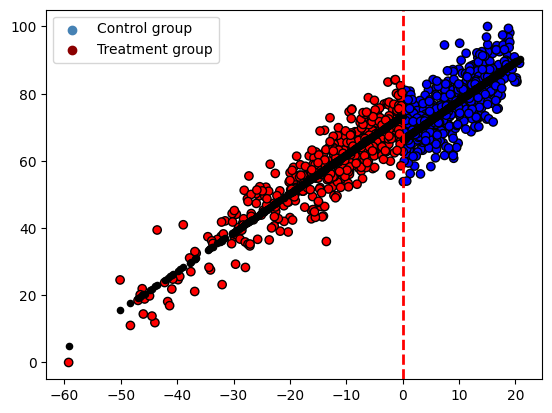

In [19]:

# Predict exam grades
predfit = result.predict(sm.add_constant(data[['Treatment', 'Attendance_c']]))

# Plot observed values
plt.scatter(data['Attendance_c'],
            data['Performance'],
            c=data['Treatment'],
            cmap=plt.cm.bwr,
            marker='o',
            # s=30,
            edgecolors='k')

# Plot cutoff line.
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

# Plot predicted values
plt.scatter(data['Attendance_c'], predfit, color='black', marker='o', s=20)

# Add legend
plt.scatter([], [], c='steelblue', marker='o', label='Control group')
plt.scatter([], [], c='darkred', marker='o', label='Treatment group')
plt.legend()

plt.show()

## Contrafactual

O conceito de contrafactual é fundamental na teoria causal e na análise de impacto de intervenções ou tratamentos em pesquisas científicas. A ideia central do contrafactual é comparar o que realmente ocorreu com o que teria ocorrido em uma situação alternativa, ou seja, contra o que não ocorreu. Em outras palavras, o contrafactual é uma representação do que teria acontecido com um indivíduo, unidade ou sistema se não tivesse sido sujeito a uma determinada intervenção.

O termo "contrafactual" é derivado de "contrafato", que se refere a algo que não aconteceu, mas que poderia ter acontecido. A análise contrafactual é crucial para entender o impacto causal de uma intervenção, pois muitas vezes não é possível observar diretamente o que teria acontecido na ausência da intervenção.

Por exemplo, ao avaliar o impacto de um programa educacional em um grupo de estudantes, o contrafactual seria representado pelas realizações acadêmicas que os estudantes teriam alcançado na ausência do programa. Comparando as realizações reais com esse contrafactual, podemos inferir o impacto causal do programa.

Existem diferentes abordagens para lidar com o contrafactual em estudos causais, e métodos estatísticos como experimentos controlados aleatórios e técnicas de emparelhamento são frequentemente utilizados para aproximar a condição contrafactual.

Em resumo, o conceito de contrafactual refere-se à comparação entre o que realmente ocorreu e o que teria ocorrido em ausência de uma intervenção, permitindo assim avaliar o verdadeiro impacto causal dessa intervenção.

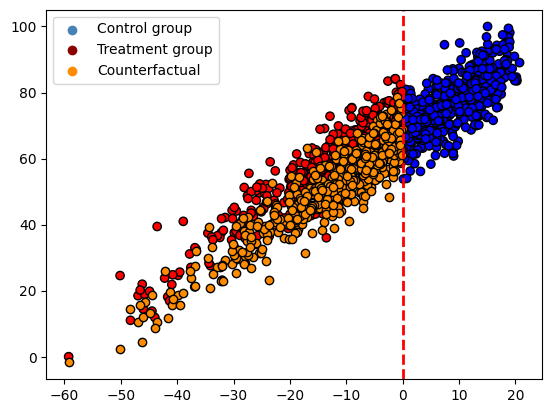

In [18]:
# Counterfactual plot
data2 = pd.DataFrame({'Performance': data['Performance'], 'Treatment': 0, 'Attendance_c': data['Attendance_c']})
predfit2 = result.predict(sm.add_constant(data2[['Treatment', 'Attendance_c']]))
data2['predfit2'] = predfit2

# Add noise to facilitate visualization
noise = np.random.normal(0, 5, len(data2[data2['Attendance_c'] < 0]))
data2.loc[data2['Attendance_c'] < 0, 'predfit2'] += noise

# Plot observed values
plt.figure()
plt.scatter(data['Attendance_c'],
            data['Performance'],
            c=data['Treatment'],
            cmap=plt.cm.bwr,
            marker='o',
            # s=50,
            edgecolors='k')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

# Plot counterfactual
plt.scatter(data2.loc[data2['Attendance_c'] < 0, 'Attendance_c'],
            data2.loc[data2['Attendance_c'] < 0, 'predfit2'],
            color='darkorange',
            marker='o',
            # s=50,
            edgecolors='k')

# Add legend
plt.scatter([], [], c='steelblue', marker='o', label='Control group')
plt.scatter([], [], c='darkred', marker='o', label='Treatment group')
plt.scatter([], [], c='darkorange', marker='o', label='Counterfactual')
plt.legend()